In [ ]:
!pip install pygmo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 43.6 MB/s eta 0:00:00


In [ ]:
import pygmo as pg
import numpy as np
from matplotlib import pyplot as plt
import cv2
import math
import seaborn as sns
import pandas as pd
from copy import deepcopy

In [ ]:
class Shvefel:
    def __init__(self):
        self.dim = 2

    def fitness(self, x):
        return [x[0] * x[0] + (x[0] + x[1]) ** 2]

    def get_bounds(self):
        return ([-10] * self.dim, [10] * self.dim)

In [ ]:
class Sphere:
    def __init__(self):
        self.dim = 2

    def fitness(self, x):
        return [sum(x**2)]

    def get_bounds(self):
        return ([-5.12] * self.dim, [5.12] * self.dim)

In [ ]:
def test(x, f_val, x_answer):
    f_answer = 0
    print("Distance to the answer point", np.linalg.norm(x - x_answer))
    print("Function value differece", f_val - f_answer)

In [ ]:
prob_1 = pg.problem(Shvefel())
prob_2 = pg.problem(Sphere())

In [ ]:
algs = [pg.pso(gen = 100), pg.sga(gen = 100), pg.de(gen = 100)]
individuals_list = []
fitness_list = []
for i in range(len(algs)):
    algo = pg.algorithm(algs[i])
    pop = pg.population(prob_1, size = 20)
    number_of_evolutions = 100
    individuals_list_tmp = []
    fitness_list_tmp = []
    for i in range(number_of_evolutions):
        pop = algo.evolve(pop)
        individuals_list_tmp.append(pop.get_x()[pop.best_idx()])
        fitness_list_tmp.append(pop.get_f()[pop.best_idx()])
    individuals_list.append(deepcopy(individuals_list_tmp))
    fitness_list.append(deepcopy(fitness_list_tmp))

In [ ]:
for i in range(len(individuals_list)):
    x = individuals_list[i][np.argmin(np.array(fitness_list[i]))]
    f_val = np.min(np.array(fitness_list[i]))
    x_answer = np.array([0, 0])
    print("------------------------------")
    test(x, f_val, x_answer)

------------------------------
Distance to the answer point 1.209238868129243e-07
Function value differece 3.6124685035000027e-14
------------------------------
Distance to the answer point 0.002149578867341539
Function value differece 4.008700505665727e-06
------------------------------
Distance to the answer point 4.75055711901031e-12
Function value differece 1.8282705327575557e-23


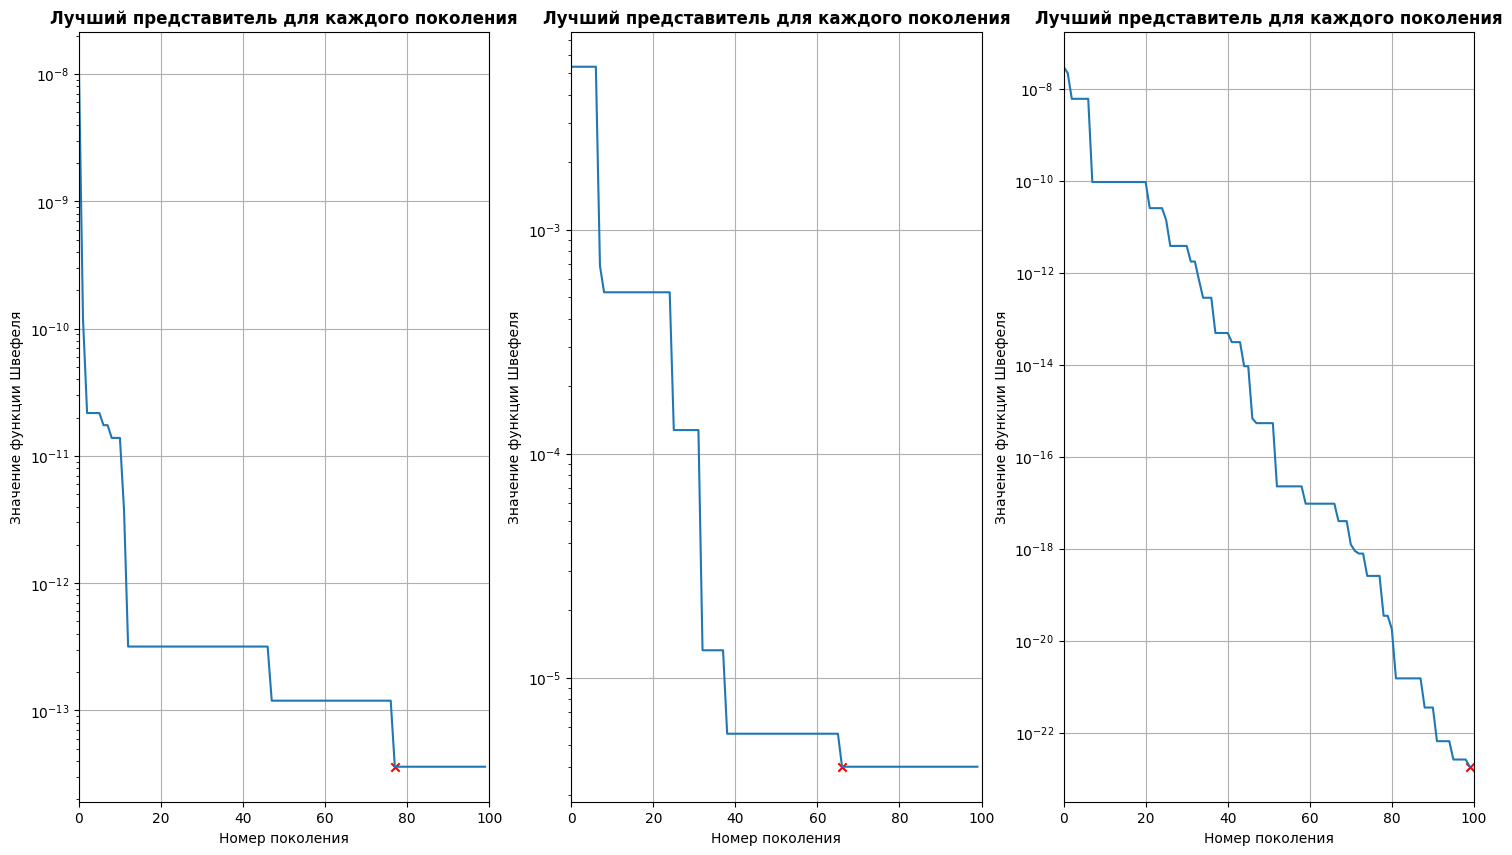

In [ ]:
fig = plt.figure(figsize=(18, 10))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
ax1.plot(np.arange(0, number_of_evolutions), fitness_list[0], label='Значение функции')
ax2.plot(np.arange(0, number_of_evolutions), fitness_list[1], label='Значение функции')
ax3.plot(np.arange(0, number_of_evolutions), fitness_list[2], label='Значение функции')

# Выведем лучший образец
champion_n = []
for i in range(len(fitness_list)):
    champion_n.append(np.argmin(np.array(fitness_list[i])))
ax1.scatter(champion_n[0], np.min(fitness_list[0]), marker='x', color='r')
ax2.scatter(champion_n[1], np.min(fitness_list[1]), marker='x', color='r')
ax3.scatter(champion_n[2], np.min(fitness_list[2]), marker='x', color='r')

# Оформление
ax1.set_xlim((0, number_of_evolutions))
ax1.grid('major')
ax1.set_title('Лучший представитель для каждого поколения', fontweight='bold')
ax1.set_xlabel('Номер поколения')
ax1.set_ylabel(r'Значение функции Швефеля')
ax1.set_yscale('log')

# Оформление
ax2.set_xlim((0, number_of_evolutions))
ax2.grid('major')
ax2.set_title('Лучший представитель для каждого поколения', fontweight='bold')
ax2.set_xlabel('Номер поколения')
ax2.set_ylabel(r'Значение функции Швефеля')
ax2.set_yscale('log')

# Оформление
ax3.set_xlim((0, number_of_evolutions))
ax3.grid('major')
ax3.set_title('Лучший представитель для каждого поколения', fontweight='bold')
ax3.set_xlabel('Номер поколения')
ax3.set_ylabel(r'Значение функции Швефеля')
ax3.set_yscale('log')

In [ ]:
algs = [pg.pso(gen = 100), pg.sga(gen = 100), pg.de(gen = 100)]
individuals_list = []
fitness_list = []
for i in range(len(algs)):
    algo = pg.algorithm(algs[i])
    pop = pg.population(prob_2, size = 20)
    number_of_evolutions = 100
    individuals_list_tmp = []
    fitness_list_tmp = []
    for i in range(number_of_evolutions):
        pop = algo.evolve(pop)
        individuals_list_tmp.append(pop.get_x()[pop.best_idx()])
        fitness_list_tmp.append(pop.get_f()[pop.best_idx()])
    individuals_list.append(deepcopy(individuals_list_tmp))
    fitness_list.append(deepcopy(fitness_list_tmp))

In [ ]:
for i in range(len(individuals_list)):
    x = individuals_list[i][np.argmin(np.array(fitness_list[i]))]
    f_val = np.min(np.array(fitness_list[i]))
    x_answer = np.array([0, 0])
    print("------------------------------")
    test(x, f_val, x_answer)

------------------------------
Distance to the answer point 9.332296455793703e-08
Function value differece 8.70917571388197e-15
------------------------------
Distance to the answer point 0.0009523046478334047
Function value differece 9.068841422851051e-07
------------------------------
Distance to the answer point 1.1462204424906031e-11
Function value differece 1.313821302783354e-22


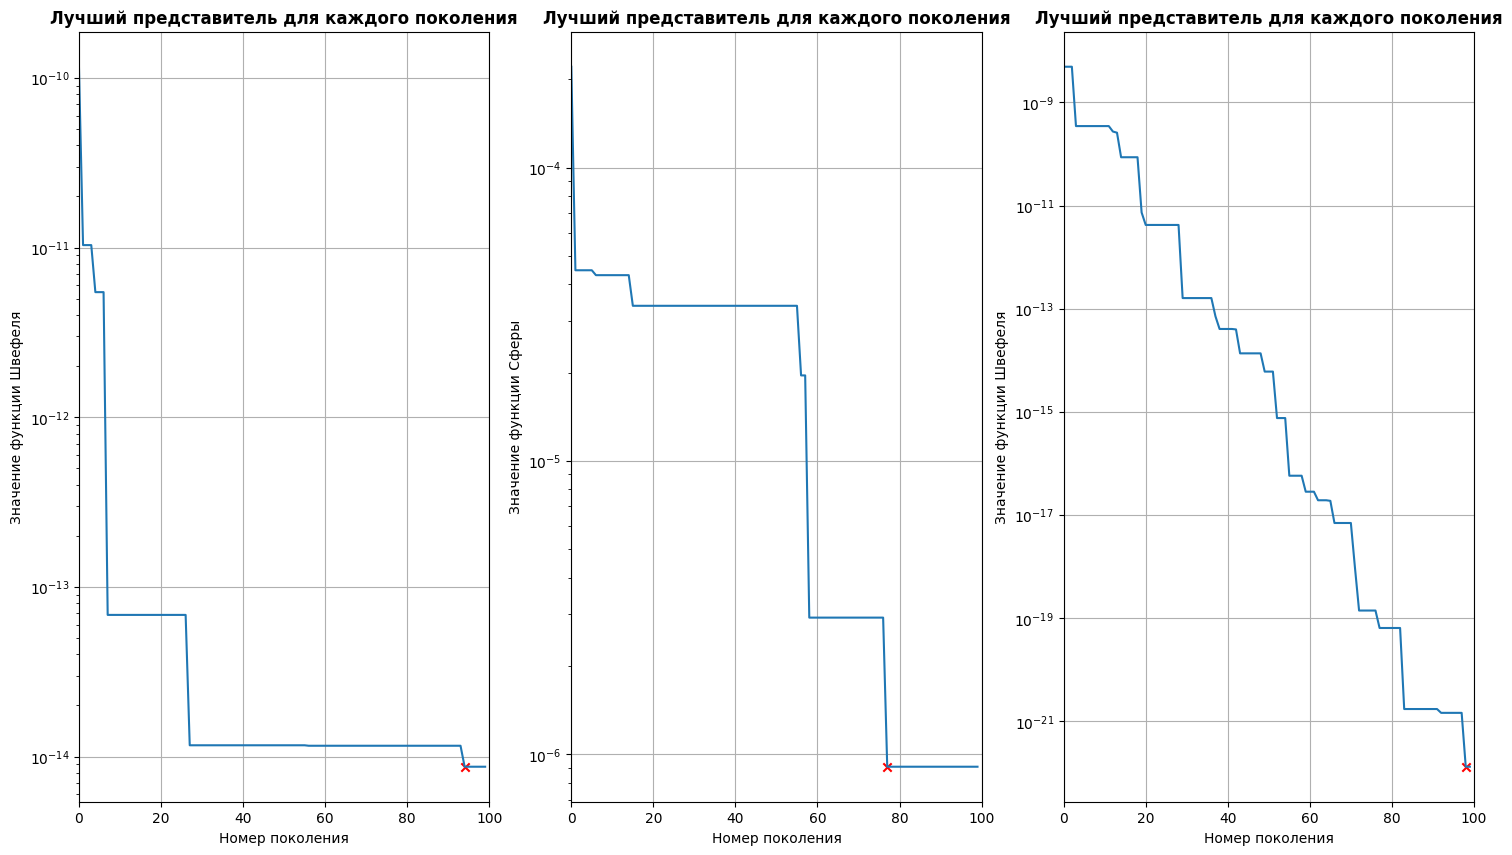

In [ ]:
fig = plt.figure(figsize=(18, 10))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
ax1.plot(np.arange(0, number_of_evolutions), fitness_list[0], label='Значение функции')
ax2.plot(np.arange(0, number_of_evolutions), fitness_list[1], label='Значение функции')
ax3.plot(np.arange(0, number_of_evolutions), fitness_list[2], label='Значение функции')

# Выведем лучший образец
champion_n = []
for i in range(len(fitness_list)):
    champion_n.append(np.argmin(np.array(fitness_list[i])))
ax1.scatter(champion_n[0], np.min(fitness_list[0]), marker='x', color='r')
ax2.scatter(champion_n[1], np.min(fitness_list[1]), marker='x', color='r')
ax3.scatter(champion_n[2], np.min(fitness_list[2]), marker='x', color='r')

# Оформление
ax1.set_xlim((0, number_of_evolutions))
ax1.grid('major')
ax1.set_title('Лучший представитель для каждого поколения', fontweight='bold')
ax1.set_xlabel('Номер поколения')
ax1.set_ylabel(r'Значение функции Швефеля')
ax1.set_yscale('log')

# Оформление
ax2.set_xlim((0, number_of_evolutions))
ax2.grid('major')
ax2.set_title('Лучший представитель для каждого поколения', fontweight='bold')
ax2.set_xlabel('Номер поколения')
ax2.set_ylabel(r'Значение функции Сферы')
ax2.set_yscale('log')

# Оформление
ax3.set_xlim((0, number_of_evolutions))
ax3.grid('major')
ax3.set_title('Лучший представитель для каждого поколения', fontweight='bold')
ax3.set_xlabel('Номер поколения')
ax3.set_ylabel(r'Значение функции Швефеля')
ax3.set_yscale('log')